# 03 Wandas Visualization: A Deep Dive
*03 Wandasによるデータ可視化：詳細ガイド*

This notebook explores the advanced visualization capabilities of Wandas. You'll learn how to create custom plots, combine different visualization types, and control the appearance of your visualizations.  
*このノートブックでは、Wandasが提供する高度な可視化機能について詳しく解説します。カスタムプロットの作成方法、さまざまな種類のグラフの組み合わせ方、そしてグラフの外観を調整する方法を学びます。*

## The Importance of Visualization in Signal Processing
*信号処理における可視化の重要性*

Visualization is a critical component of signal processing workflows. It helps us:  
*データの可視化は、信号処理のワークフローにおいて非常に重要な役割を果たします。可視化によって、私たちは以下のことが可能になります。*

1. **Inspect data** before and after processing   
   *処理前後のデータを詳細に確認する*
2. **Identify patterns or anomalies** in signals   
   *信号に含まれるパターンや異常を発見する*
3. **Compare different processing methods**   
   *さまざまな処理方法の効果を比較・評価する*
4. **Communicate findings** to others   
   *分析結果や洞察を他者と効果的に共有する*

Wandas provides a rich set of visualization tools that work seamlessly with different types of data frames:  
*Wandasは、さまざまな種類のデータフレーム（`ChannelFrame`、`SpectralFrame`、`SpectrogramFrame`など）とシームレスに連携する、豊富な可視化ツールを提供しています。*

- `ChannelFrame.plot()`: Time domain visualization  
  *時間領域のデータを可視化します*
- `SpectralFrame.plot()`: Frequency domain visualization  
  *周波数領域のデータを可視化します*
- `SpectrogramFrame.plot()`: Time-frequency visualization  
  *時間周波数領域のデータを可視化します*

Let's explore these capabilities through examples.  
*具体的な例を通して、これらの強力な機能を一緒に見ていきましょう。*

In [1]:
# 必要なライブラリをインポートします
import wandas as wd
import numpy as np
import matplotlib.pyplot as plt

# matplotlibをインタラクティブなプロット表示のためウィジェットモードに設定します
# %matplotlib widget
plt.rcParams['figure.figsize'] = (10, 4)

# 2つの正弦波（2500Hz および 5000Hz）を含む合成信号を生成します
cf = wd.generate_sin(freqs=[2500, 5000], duration=2, sampling_rate=44100)

# 信号に関する基本情報を表示します
print(f"Signal information:")
print(f"Sampling rate: {cf.sampling_rate} Hz")
print(f"Duration: {cf.duration:.2f} seconds")
print(f"Shape: {cf.shape} (channels, samples)")

Signal information:
Sampling rate: 44100 Hz
Duration: 2.00 seconds
Shape: (2, 88200) (channels, samples)


## Basic Plot with `.describe()`
*`.describe()`による基本プロット*

Wandas provides a convenient `.describe()` method to quickly display visualizations for a signal and audio controls. This is the fastest way to get an overview of your data.  
*Wandas には、信号の可視化とオーディオコントロールを素早く表示するための便利な `.describe()` メソッドが用意されています。これは、データの概要を把握する最も手軽な方法です。*

This single method allows you to check the following main elements at once, as demonstrated in the cell below where we generate a synthetic signal and then use `.describe()`:
*このメソッド一つで、主に以下の要素を一度に確認できます。下のセルでは、合成信号を生成し、その後 `.describe()` を使用する例を示します。*
- Time domain plot  
  *時間領域プロット*
- Frequency domain plot  
  *周波数領域プロット*
- Spectrogram  
  *スペクトログラム*
- Audio playback controls  
  *オーディオ再生コントロール*

---

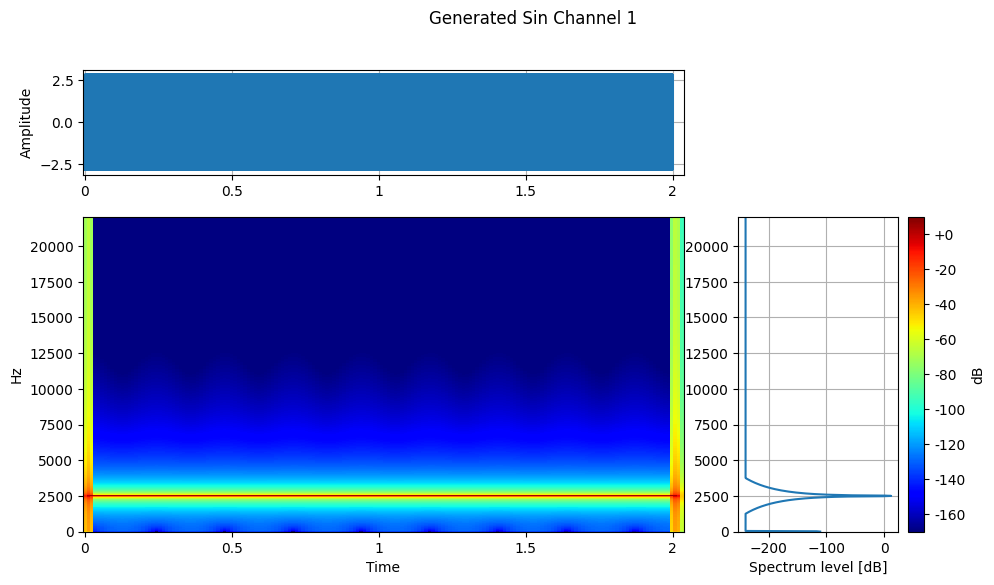

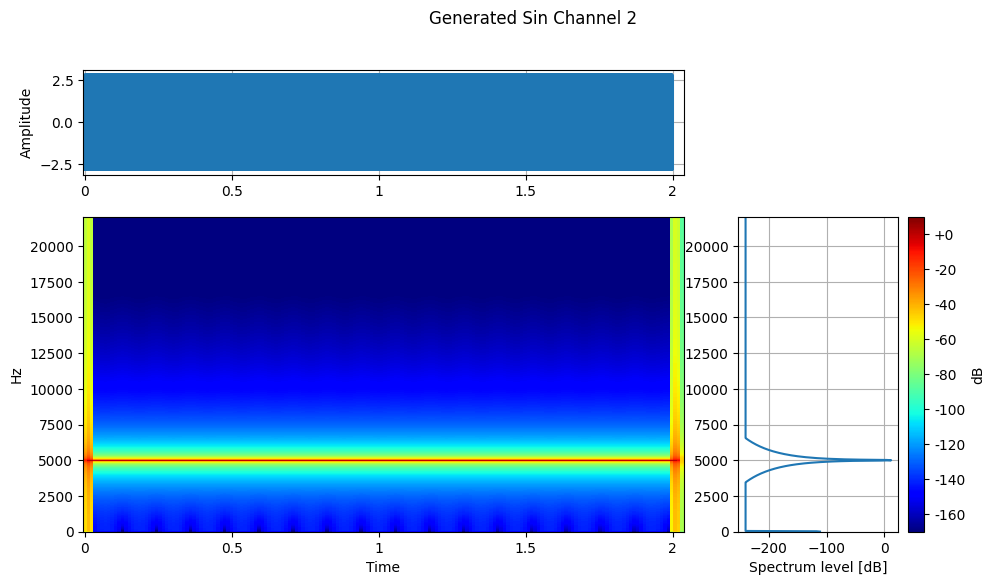

In [2]:
cf.describe()


Customized describe:


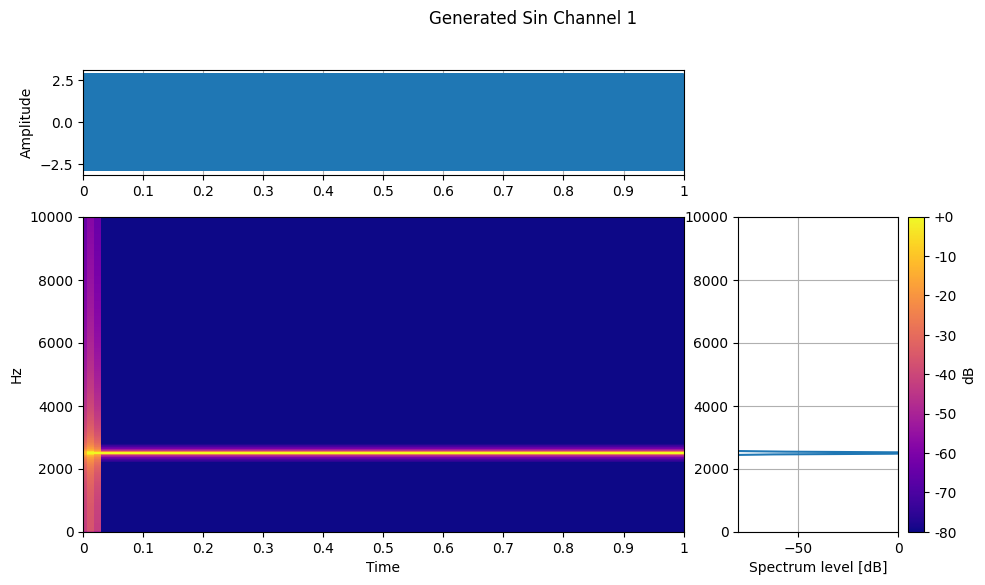

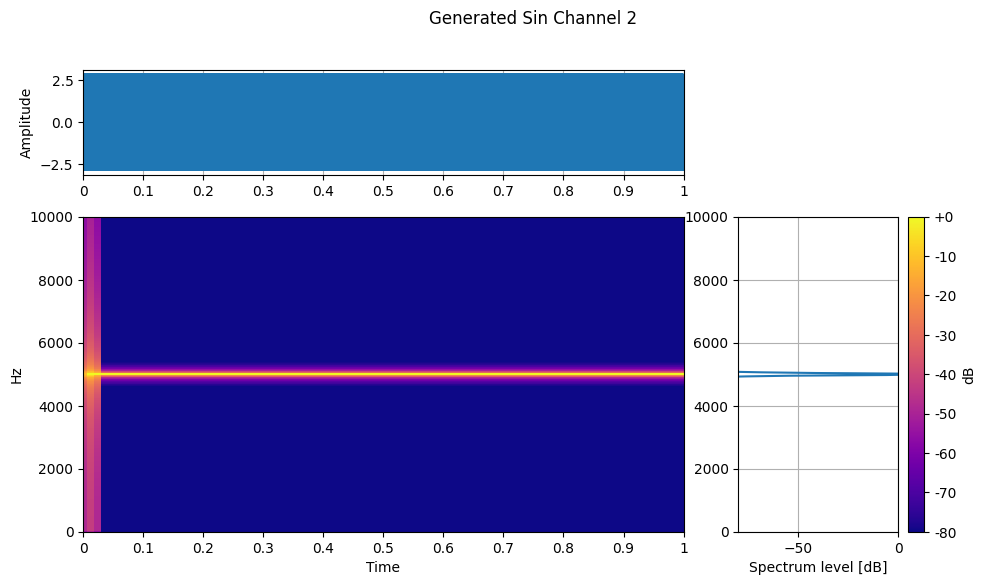

In [3]:
# Customizing describe plots
# describeプロットのカスタマイズ
print("\nCustomized describe:")
cf.describe(
    xlim=(0, 1),
    ylim=(0, 10000),
    fmin=0,
    fmax=10000,
    vmax=0,
    vmin=-80,
    cmap='plasma'
)

## Customizing Plots
*プロットのカスタマイズ*

Wandas plotting methods accept many customization parameters that are passed to the underlying Matplotlib functions. Let's explore some common customization options. Many of these options are standard Matplotlib arguments that you might already be familiar with.
*Wandasのプロットメソッドは、基礎となるMatplotlib関数に渡される多くのカスタマイズパラメータを受け入れます。一般的なカスタマイズオプションをいくつか見ていきましょう。これらのオプションの多くは、すでにお馴染みかもしれない標準的なMatplotlibの引数です。*

### General Plot Customization
*一般的なプロットカスタマイズ*

Common parameters applicable to most plot types include:
*ほとんどのプロットタイプに適用可能な共通パラメータには、以下のようなものがあります。*

- `title`: Set the plot title  
  *プロットのタイトルを設定します*
- `xlabel`, `ylabel`: Customize axis labels  
  *軸ラベルをカスタマイズします*
- `xlim`, `ylim`: Set axis limits  
  *軸の範囲を設定します*
- `label`: Add legend labels (useful when overlaying plots)
  *凡例ラベルを追加します（プロットを重ね合わせる際に便利です）*


### Time Domain Plot Customization
*時間領域プロットのカスタマイズ*

Let's create a customized time domain plot. In the example below, we generate a more complex signal with a decaying tone and then plot it with a specific title, axis labels, x-axis limits, line width, color, and alpha (transparency).  
*カスタマイズされた時間領域プロットを作成してみましょう。以下の例では、減衰するトーンを持つより複雑な信号を生成し、特定のタイトル、軸ラベル、x軸の範囲、線の太さ、色、アルファ（透明度）でプロットします。*

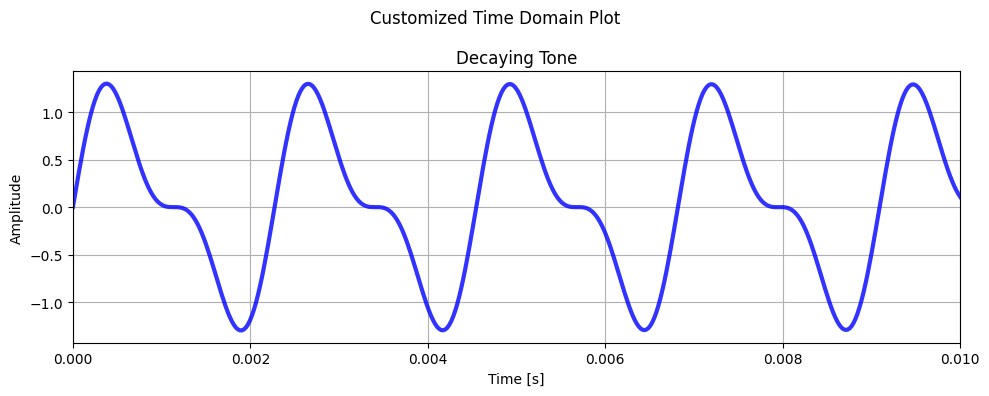

In [4]:
# Generate a more complex signal
# より複雑な信号を生成
t = np.linspace(0, 2, 2 * 44100)  # 2 seconds at 44.1kHz
signal = np.sin(2 * np.pi * 440 * t) * np.exp(-t) + 0.5 * np.sin(2 * np.pi * 880 * t)
complex_cf = wd.from_numpy(signal.reshape(1, -1), sampling_rate=44100, ch_labels=["Decaying Tone"])

# Create a customized time domain plot
# カスタマイズされた時間領域プロットを作成
complex_cf.plot(
    title='Customized Time Domain Plot',
    xlabel='Time (seconds)',
    ylabel='Amplitude',
    xlim=(0, .01),                  # Show only first second
    linewidth=3,                  # Thicker line
    color='blue',                 # Line color
    alpha=0.8                     # Transparency
)


### Frequency Domain Plot Customization
*周波数領域プロットのカスタマイズ*

For frequency domain plots (derived from `SpectralFrame`), additional customization options are available:  
*周波数領域プロット（`SpectralFrame`から派生）では、さらに詳細なカスタマイズオプションが利用可能です。*

Let's create a customized frequency domain plot. The code below generates a C major chord and then plots its magnitude spectrum using a Hann window, with custom title and axis limits.  
*カスタマイズされた周波数領域プロットを作成してみましょう。以下のコードは、Cメジャーコードを生成し、ハン窓を使用してそのマグニチュードスペクトルをカスタムタイトルと軸範囲でプロットします。*

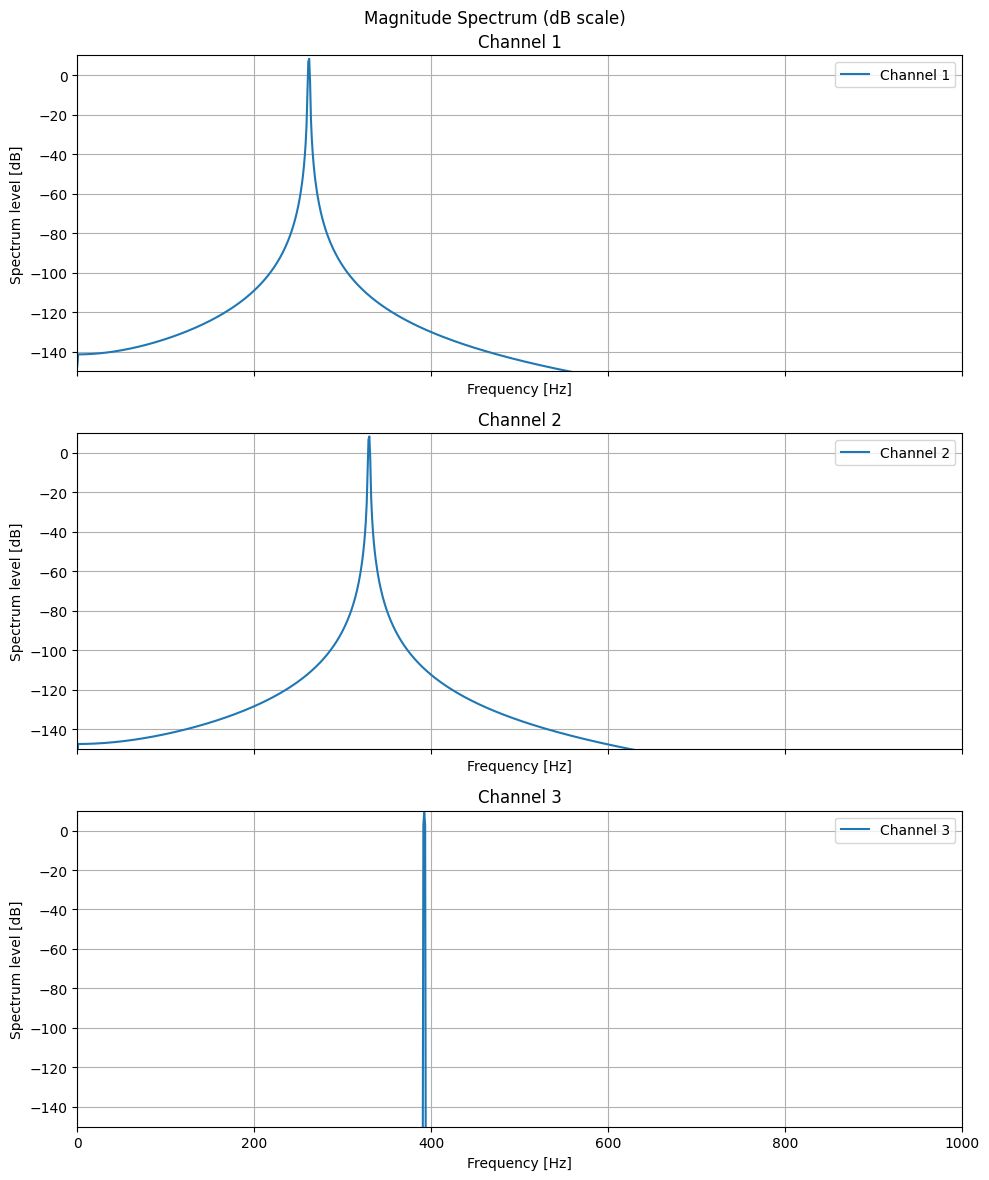

In [5]:
# Create a signal with multiple frequency components
# 複数の周波数成分を持つ信号を作成
freqs = [261.63, 329.63, 392.0]  # C4, E4, G4 (C major chord)
chord = wd.generate_sin(freqs=freqs, duration=1.0, sampling_rate=44100)

# Plot 1: Magnitude in dB scale
# プロット1：dBスケールの大きさ
spectral = chord.fft(window='hann')
spectral.plot(
    title='Magnitude Spectrum (dB scale)',
    xlim=(0, 1000),
    ylim=(-150, 10),
)

### Spectrogram Customization
*スペクトログラムのカスタマイズ*

Spectrograms (derived from `SpectrogramFrame`) visualize how the frequency content of a signal changes over time. They have additional customization options:  
*スペクトログラム（`SpectrogramFrame`から派生）は、信号の周波数成分が時間とともにどのように変化するかを視覚化します。追加のカスタマイズオプションがあります。*

- `cmap`: Colormap for the spectrogram (e.g., 'viridis', 'inferno', 'magma').  
  *スペクトログラムのカラーマップ（例：'viridis'、'inferno'、'magma'）。*
- `vmin`, `vmax`: Set the color scale limits, controlling the mapping of data values to colors.  
  *カラースケールの範囲を設定し、データ値から色へのマッピングを制御します。*
- `cbar`: Boolean indicating whether to show a colorbar (default: `True`).  
  *カラーバーを表示するかどうかを示すブール値（デフォルト：`True`）。*

Let's create customized spectrograms with different settings. The following code generates a chirp signal (where frequency increases over time) and then plots its spectrogram twice, once with the default 'viridis' colormap and once with the 'inferno' colormap, also customizing the colorbar label and y-axis limits.  
*異なる設定でカスタマイズされたスペクトログラムを作成しましょう。以下のコードは、チャープ信号（周波数が時間とともに増加する信号）を生成し、そのスペクトログラムを2回プロットします。1回目はデフォルトの'viridis'カラーマップで、2回目は'inferno'カラーマップを使用し、カラーバーのラベルとy軸の範囲もカスタマイズします。*

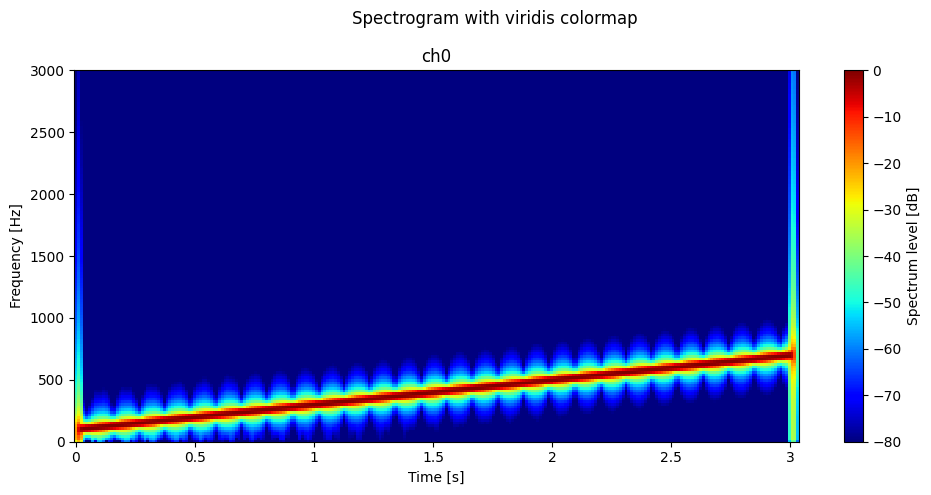

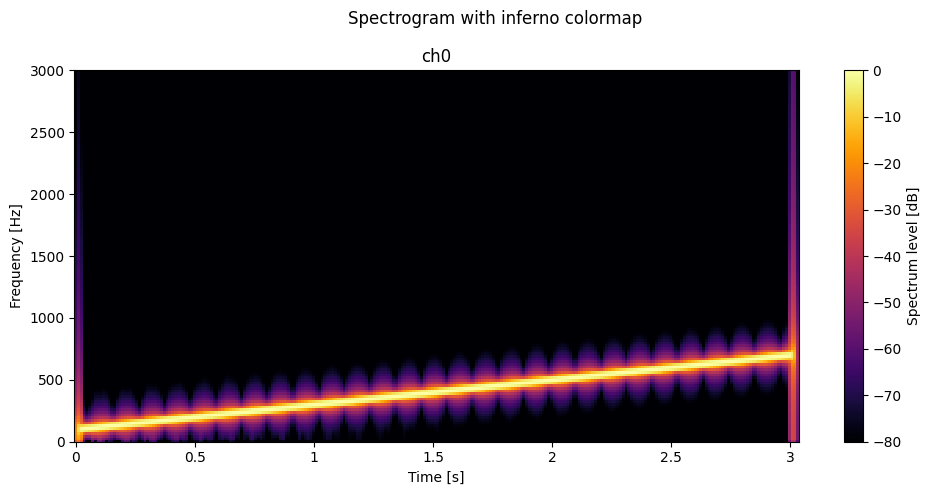

In [6]:
# Create a chirp signal (frequency sweep)
# チャープ信号（周波数スイープ）を作成
t = np.linspace(0, 3, 3 * 44100)
chirp_signal = np.sin(2 * np.pi * 100 * t * (1 + t))  # Frequency increases with time
chirp_cf = wd.from_numpy(chirp_signal.reshape(1, -1), sampling_rate=44100)

# Create the spectrogram
# スペクトログラムを作成
spectrogram = chirp_cf.stft(n_fft=2048, hop_length=512)

# Plot 1: Default 'viridis' colormap
# プロット1：デフォルトの'viridis'カラーマップ
spectrogram.plot(
    title='Spectrogram with viridis colormap',
    cbar=True,
    cbar_label='Magnitude (dB)',
    ylim=(0, 3000),
    vmin=-80,             # Minimum value for color scale
    vmax=0                # Maximum value for color scale
)

# Plot 2: Custom 'inferno' colormap
# プロット2：カスタムの'inferno'カラーマップ
spectrogram.plot(
    title='Spectrogram with inferno colormap',
    cmap='inferno',       # Different colormap
    cbar=True,
    cbar_label='Magnitude (dB)',
    ylim=(0, 3000),
    vmin=-80,             # Minimum value for color scale
    vmax=0                # Maximum value for color scale
)


## Overlay Plots
*重ね合わせプロット*

Wandas allows you to overlay multiple plots on the same axes by setting the `overlay=True` parameter. This is particularly useful for comparing different signals or visualizing a signal before and after a processing step.
*Wandasでは、`overlay=True` パラメータを設定することで、複数のプロットを同じ軸に重ね合わせることができます。これは、異なる信号を比較したり、処理ステップの前後の信号を視覚化したりするのに特に役立ちます。*

### Comparing Multiple Signals
*複数の信号の比較*

Let's compare different signals in both the time and frequency domains. The code below creates three signals: a pure sine wave, a sine wave with a harmonic, and a chord. These are combined into a single `ChannelFrame` and then plotted with `overlay=True`.
*時間領域と周波数領域の両方で異なる信号を比較してみましょう。以下のコードは、純粋な正弦波、高調波を含む正弦波、和音の3つの信号を作成します。これらは単一の `ChannelFrame` に結合され、その後 `overlay=True` でプロットされます。*

<Axes: title={'center': 'Frequency Domain Comparison'}, xlabel='Frequency [Hz]', ylabel='Spectrum level [dB]'>

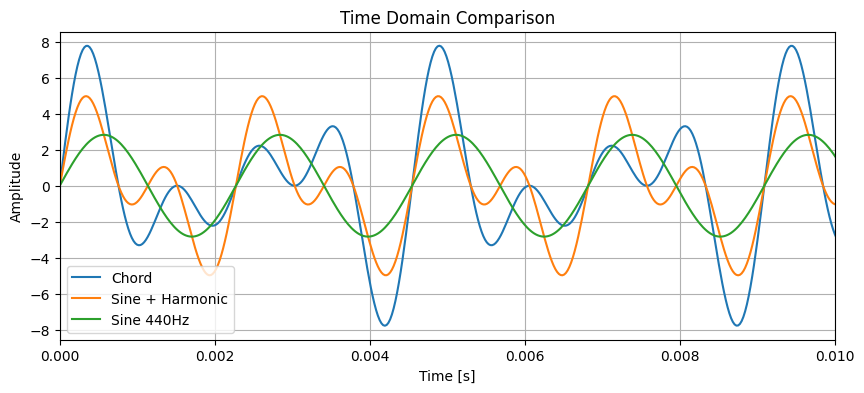

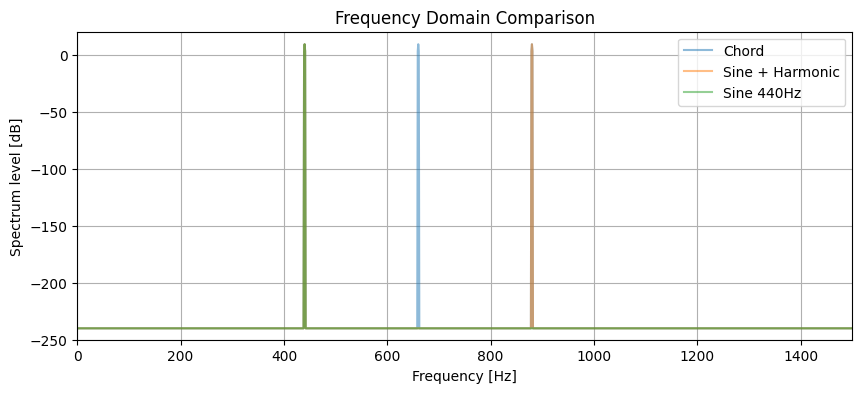

In [7]:
# Create three different signals
# 3つの異なる信号を作成
signal1 = wd.generate_sin(freqs=[440], duration=1.0, sampling_rate=44100)  # Pure sine
signal1._channel_metadata[0].label  = "Sine 440Hz"  # Rename channel
signal2 = signal1 + wd.generate_sin(freqs=[880], duration=1.0, sampling_rate=44100)  # Sine + harmonic
signal2._channel_metadata[0].label  = "Sine + Harmonic"  # Rename channel
signal3 = signal2 + wd.generate_sin(freqs=[660], duration=1.0, sampling_rate=44100)  # Chord
signal3._channel_metadata[0].label  = "Chord"  # Rename channel
signal = signal3.add_channel(signal2).add_channel(signal1)

# Time domain comparison - overlay all signals
# 時間領域比較 - すべての信号を重ね合わせる
signal.plot(
    title='Time Domain Comparison',
    xlim=(0, 0.01),  # Zoom to show detail
    overlay=True
)

# Frequency domain comparison - overlay all signals
# 周波数領域比較 - すべての信号を重ね合わせる
kw = dict(xlim=(0, 1500), ylim=(-250, 20),alpha=0.5)
signal.fft().plot(
    title='Frequency Domain Comparison',
    overlay=True,
    **kw
)

### Before/After Processing Comparison
*処理前後の比較*

A common use case for overlay plots is comparing a signal before and after a processing step, such as filtering. Let's create a noisy signal, apply a low-pass filter to it, and then visualize both the original noisy signal and the filtered signal on the same plots for time domain, frequency domain, and spectrogram representations.  
*重ね合わせプロットの一般的なユースケースは、フィルタリングなどの処理ステップの前後の信号を比較することです。ノイズの多い信号を作成し、それにローパスフィルターを適用し、元のノイズの多い信号とフィルター処理された信号の両方を、時間領域、周波数領域、およびスペクトログラム表現で同じプロットに視覚化してみましょう。*

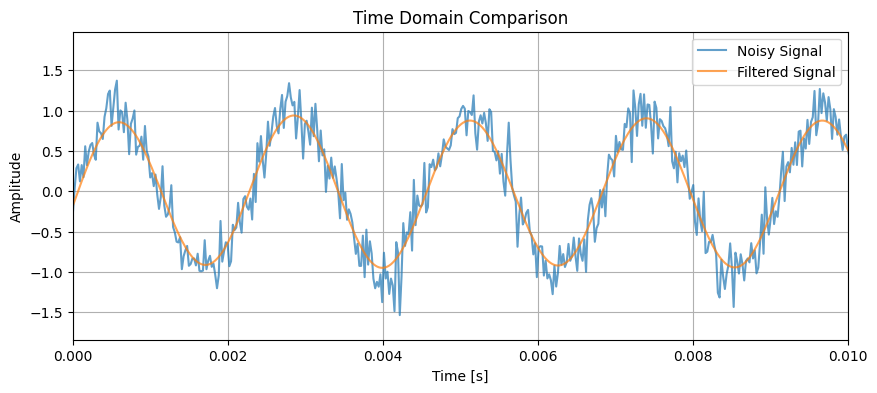

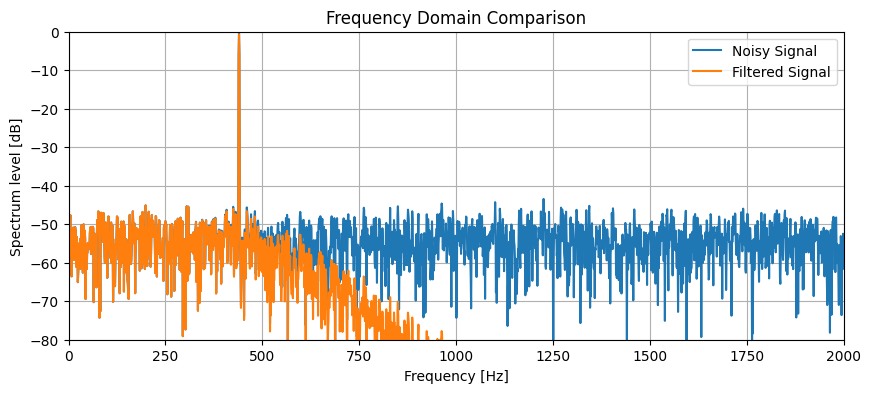

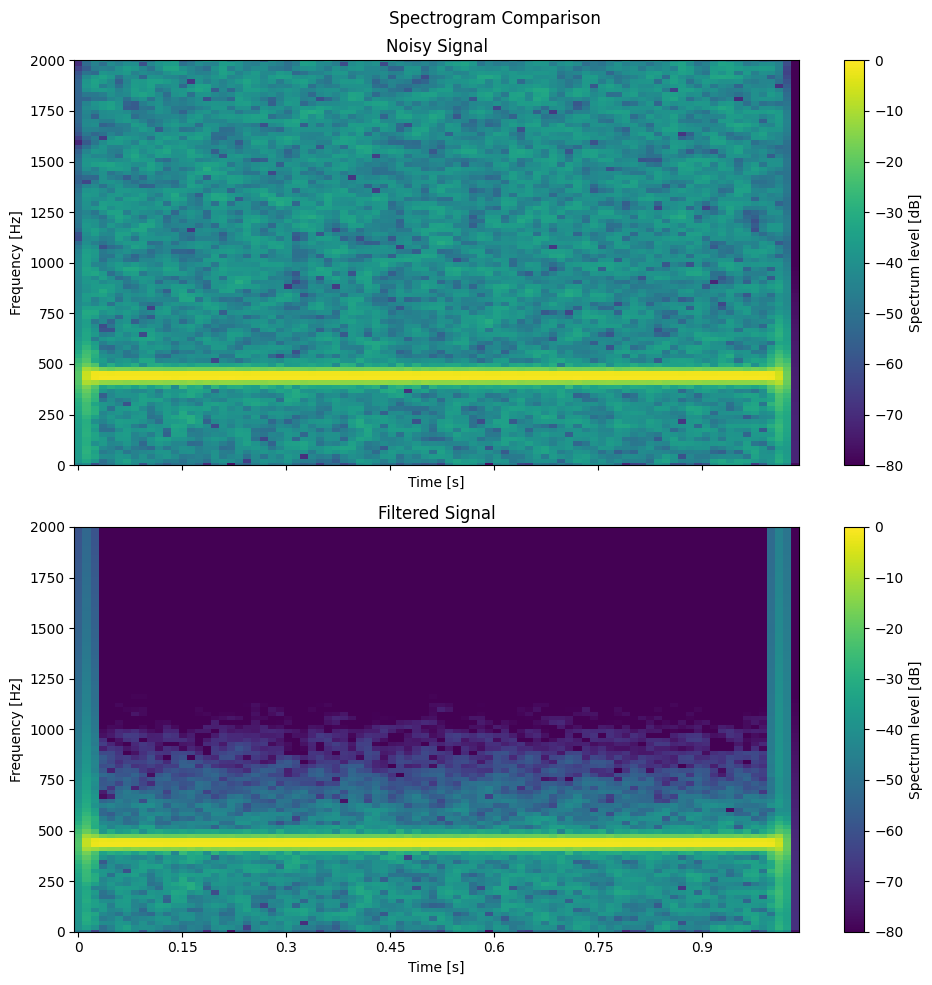

In [8]:
# Create a signal with noise
# ノイズを含む信号を作成
t = np.linspace(0, 1, 44100)
clean_signal = np.sin(2 * np.pi * 440 * t)
noise = 0.2 * np.random.randn(len(t))
noisy_signal = clean_signal + noise

# Convert to wandas ChannelFrame
# wandas ChannelFrameに変換
noisy_cf = wd.from_numpy(noisy_signal.reshape(1, -1), sampling_rate=44100, ch_labels=["Noisy Signal"])

# Apply a low-pass filter to remove high-frequency noise
# 高周波ノイズを除去するためにローパスフィルターを適用
filtered_cf = noisy_cf.low_pass_filter(cutoff=600, order=4)
filtered_cf._channel_metadata[0].label = "Filtered Signal"  # Rename channel

comparison_cf = noisy_cf.add_channel(filtered_cf)

# Time domain comparison
# 時間領域比較
comparison_cf.plot(
    title='Time Domain Comparison',
    xlim=(0, 0.01),  # Zoom to show detail
    alpha=0.7,
    overlay=True)


# Frequency domain comparison
# 周波数領域比較
kw = dict(xlim=(0, 2000), ylim=(-80, 0), db_scale=True)
comparison_cf.fft().plot(
    title='Frequency Domain Comparison',
    overlay=True,
    **kw
)

# Shared colormap settings for visual consistency
# 視覚的な一貫性のための共有カラーマップ設定
specgram_kw = dict(
    ylim=(0, 2000),
    vmin=-80,
    vmax=0,
    cmap='viridis'
)
ax_itr = comparison_cf.stft(n_fft=2048, hop_length=512).plot(
    title='Spectrogram Comparison',
    **specgram_kw
)
axs = list(ax_itr)


## Advanced Visualization Techniques
*高度な可視化テクニック*

Wandas visualization tools are built on Matplotlib, allowing you to combine Wandas' convenience with Matplotlib's extensive capabilities for more sophisticated visualizations.  
*Wandasの可視化ツールはMatplotlibを基盤として構築されているため、Wandasの利便性とMatplotlibの広範な機能を組み合わせて、より洗練された視覚化を作成できます。*

### Multi-Channel Visualization  
*マルチチャンネルの可視化**

When dealing with multi-channel signals (e.g., stereo audio), Wandas can plot all channels together or you can select and plot individual channels. The example below creates a stereo signal with a phase shift between the left and right channels. It then plots both channels overlaid, followed by separate plots for the left and right channels with custom styling.  
*マルチチャンネル信号（例：ステレオオーディオ）を扱う場合、Wandasはすべてのチャンネルを一緒にプロットすることも、個々のチャンネルを選択してプロットすることもできます。以下の例では、左右のチャンネル間に位相シフトがあるステレオ信号を作成します。次に、両方のチャンネルを重ねてプロットし、その後、左右のチャンネルをカスタムスタイルで個別にプロットします。*

Number of channels: 2
Channel labels: ['Left', 'Right']


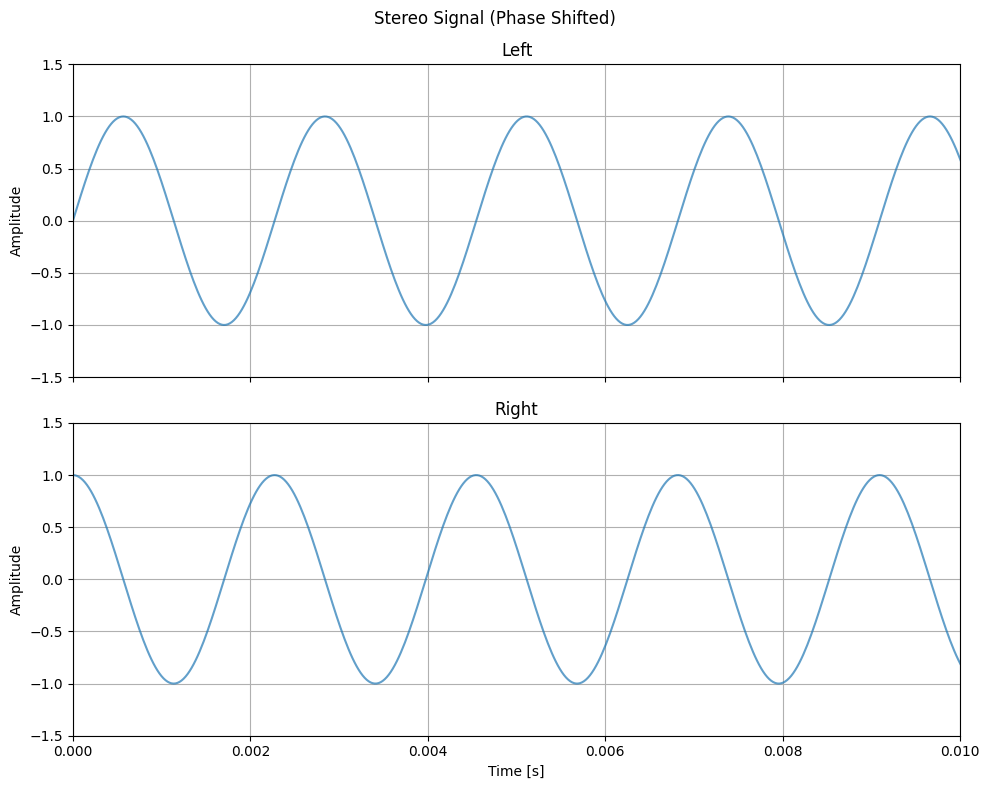

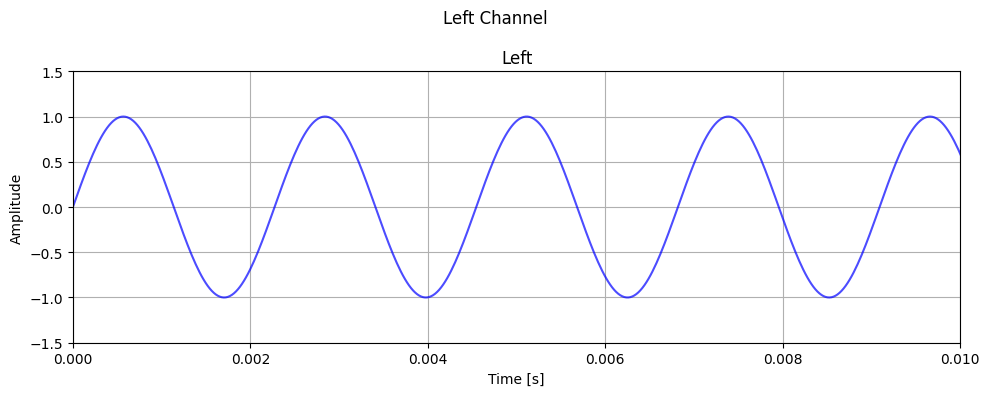

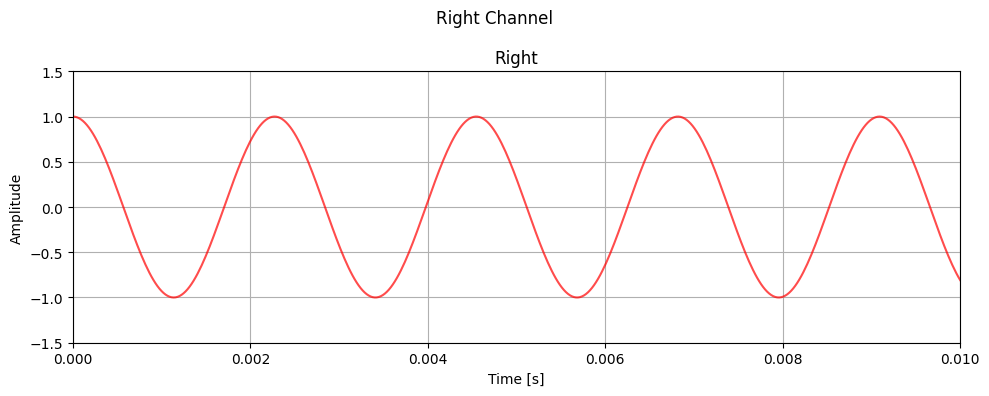

In [9]:
# Create a stereo signal (2 channels)
# ステレオ信号（2チャンネル）を作成
t = np.linspace(0, 2, 2 * 44100)
left_channel = np.sin(2 * np.pi * 440 * t)
right_channel = np.sin(2 * np.pi * 440 * t + np.pi/2)  # Phase shifted
stereo_data = np.vstack([left_channel, right_channel])

# Convert to wandas ChannelFrame
# wandas ChannelFrameに変換
stereo_cf = wd.from_numpy(stereo_data, sampling_rate=44100, ch_labels=["Left", "Right"])

# Display channel information
# チャンネル情報を表示
print(f"Number of channels: {stereo_cf.n_channels}")
print(f"Channel labels: {stereo_cf.labels}")

kw = dict(xlim=(0, 0.01), ylim=(-1.5, 1.5), alpha=0.7)
# Plot both channels
# 両方のチャンネルをプロット
stereo_cf.plot(title='Stereo Signal (Phase Shifted)', **kw)

# Plot each channel separately with custom styling
# 各チャンネルを個別にカスタムスタイルでプロット
stereo_cf[0].plot(color='blue', title='Left Channel', **kw)
stereo_cf[1].plot(color='red', title='Right Channel', **kw)


### Interactive Visualizations
*インタラクティブな可視化*

Wandas integrates well with interactive Matplotlib backends and Jupyter widgets, enabling you to create dynamic visualizations. The following code demonstrates how to use `ipywidgets` (specifically `interact`, `IntSlider`, and `FloatSlider`) to create an interactive plot where you can adjust the frequency and duration of a sine wave, and the `.describe()` plot updates dynamically.  
*Wandasは、インタラクティブなMatplotlibバックエンドやJupyterウィジェットとうまく統合し、動的な視覚化を作成できます。以下のコードは、`ipywidgets`（具体的には `interact`、`IntSlider`、`FloatSlider`）を使用して、正弦波の周波数と持続時間を調整でき、`.describe()` プロットが動的に更新されるインタラクティブなプロットを作成する方法を示しています。*

In [10]:
from ipywidgets import interact, FloatSlider, IntSlider
from IPython.display import clear_output
# Function to generate and plot a signal with given frequency
# 指定された周波数で信号を生成してプロットする関数
def plot_sine_wave(frequency=440, duration=0.5):
    sig = wd.generate_sin(freqs=[frequency], duration=duration, sampling_rate=44100)

    clear_output(wait=True)
    sig.describe()


# Create interactive widget
# インタラクティブウィジェットを作成
interact(
    plot_sine_wave,
    frequency=IntSlider(min=20, max=10000, step=10, value=440, description='Frequency (Hz)'),
    duration=FloatSlider(min=0.1, max=2.0, step=0.1, value=0.5, description='Duration (s)')
)

/home/vscode/.venv/lib/python3.10/site-packages/ipywidgets/widgets/interaction.py:44: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


interactive(children=(IntSlider(value=440, description='Frequency (Hz)', max=10000, min=20, step=10), FloatSli…

<function __main__.plot_sine_wave(frequency=440, duration=0.5)>

## Summary
*まとめ*

In this notebook, we've explored Wandas' rich visualization capabilities, covering:  
*このノートブックでは、Wandasの豊富な可視化機能を探求し、以下をカバーしました。*

- The `.describe()` method for quick, comprehensive overviews.  
  *迅速で包括的な概要を得るための `.describe()` メソッド。*
- Customizing plots for time domain, frequency domain, and spectrogram representations using various parameters.  
  *さまざまなパラメータを使用した、時間領域、周波数領域、およびスペクトログラム表現のプロットのカスタマイズ。*
- Overlaying plots to compare multiple signals or before/after processing states.  
  *複数の信号または処理前後の状態を比較するためのプロットの重ね合わせ。*
- Techniques for multi-channel and interactive visualizations.  
  *マルチチャンネルおよびインタラクティブな視覚化のテクニック。*

Wandas' visualization functions are designed to work seamlessly with Matplotlib, offering both simplicity for common tasks and flexibility for advanced customization. You can quickly generate standard plots with sensible defaults or tailor them extensively to meet specific analytical needs.  
*Wandasの可視化機能はMatplotlibとシームレスに連携するように設計されており、一般的なタスクに対するシンプルさと高度なカスタマイズに対する柔軟性の両方を提供します。賢明なデフォルト値で標準的なプロットを迅速に生成することも、特定の分析ニーズに合わせて広範囲に調整することもできます。*

## Next Steps
*次のステップ*

In the next notebook, we'll delve deeper into time-frequency analysis techniques, building upon the visualization concepts introduced here.  
*次のノートブックでは、ここで紹介した視覚化の概念を基に、時間-周波数分析技術をさらに深く掘り下げます。*

**Next notebook**: [04_time_frequency.ipynb](./04_time_frequency.ipynb)  
*次のノートブック： [04_time_frequency.ipynb](./04_time_frequency.ipynb)*